## Install Packages

In [2]:
# pyspark 

!pip install pyspark

In [3]:
!pip install -U textblob

In [4]:
!pip install tensorflow

In [5]:
!pip install gensim

In [6]:
!pip install wordcloud

In [7]:
!pip install plotly

In [8]:
!pip install statsmodels

In [9]:
!pip install --upgrade gensim nltk

In [43]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/c6/2e91eefb757822e70d351e02cc38d07c137212ae7c41ac12746415b4860a/scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 1.0 MB/s eta 0:00:0000:010:00:01


## Import Libraries

In [20]:
# base 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

#nlp   
import re
import gensim  
import nltk 
from nltk.sentiment import SentimentIntensityAnalyzer 
from textblob import TextBlob 
from wordcloud import WordCloud, STOPWORDS 

from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer


#modelling 
import tensorflow as tf
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import train_test_split
# Plot the classification_report 
from sklearn.metrics import classification_report 
# Model Evaluation 
from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [2]:
# import pyspark

from pyspark.sql import SparkSession

In [ ]:
# create variable called spark 

spark = SparkSession.builder.appName('PorjectTweets').getOrCreate()

In [89]:
# spark 

spark

In [5]:
tw = pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/ProjectTweets.csv")

In [6]:
tw

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
# read the dataset 

spark.read.option('header','true').csv('C:/Users/tolga/OneDrive/Masaüstü/ProjectTweets.csv').show()

In [9]:
#read dataset
tw = pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/ProjectTweets.csv", encoding = 'latin', header=None)

In [10]:
tw.dtypes

0     int64
1     int64
2    object
3    object
4    object
5    object
dtype: object

In [11]:
tw = tw.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'})

In [12]:
tw.head()

,target,id,date,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Check missing values

In [13]:
tw.isna().sum()

target      0
id          0
date        0
query       0
username    0
content     0
dtype: int64

## Word Cloud

In [14]:
# word cloud 

#Make a word Cloud from dataset
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [15]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=40, max_words=700,background_color="#002210").generate(text)
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.style.use('ggplot')
    plt.show()

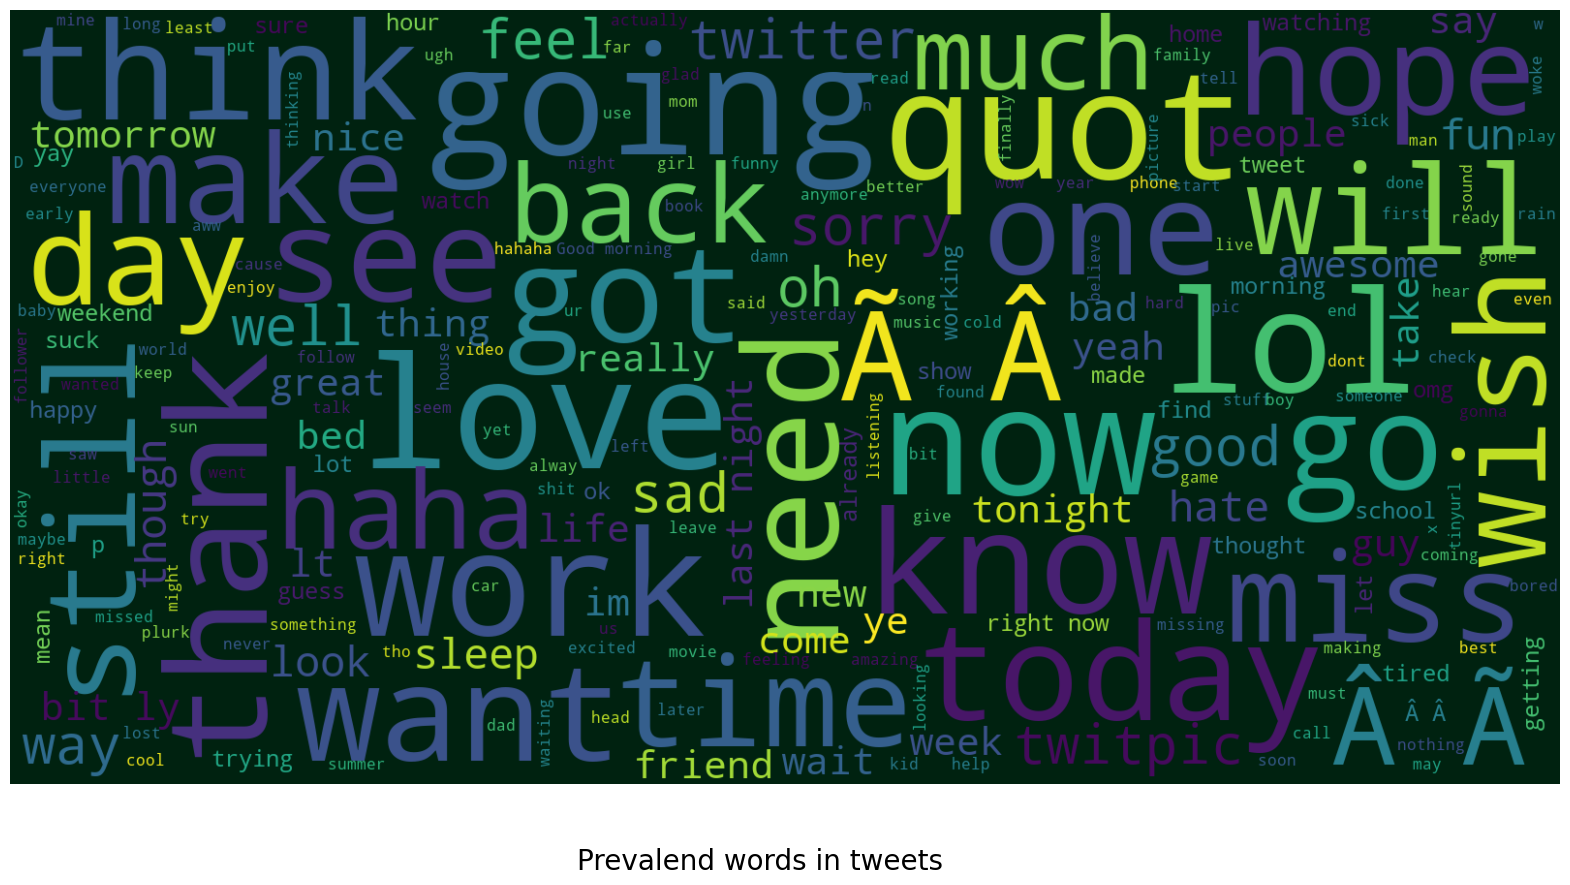

In [16]:
show_wordcloud(tw['content'] , title = 'Prevalend words in tweets')

## Hastag Analysis

In [17]:
# analysis to hastag 
def plot_features_(features, title, tw, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(tw[feature]),kde=True,hist=False, bins=120, label=feature,color='blue')
        else:
            sns.distplot(tw[feature],kde=True, hist=False, bins=120, label=feature,color='blue')
    plt.xlabel('')
    plt.legend()
    plt.show();

## Preprocessing Dataset

In [18]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [21]:
temp = []
#Splitting pd.Series to list
data_to_list = tw["content"].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

[' - Awww, thats a bummer. You shoulda got David Carr of Third Day to do it. ;D',
 'is upset that he cant update his Facebook by texting it... and might cry as a result School today also. Blah!',
 'I dived many times for the ball. Managed to save 50% The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 'no, its not behaving at all. im mad. why am i here? because I cant see you all over there. ']

In [22]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        

data_words = list(sent_to_words(temp))
print(data_words[:10],'\n')

[['awww', 'thats', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it'], ['is', 'upset', 'that', 'he', 'cant', 'update', 'his', 'facebook', 'by', 'texting', 'it', 'and', 'might', 'cry', 'as', 'result', 'school', 'today', 'also', 'blah'], ['dived', 'many', 'times', 'for', 'the', 'ball', 'managed', 'to', 'save', 'the', 'rest', 'go', 'out', 'of', 'bounds'], ['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire'], ['no', 'its', 'not', 'behaving', 'at', 'all', 'im', 'mad', 'why', 'am', 'here', 'because', 'cant', 'see', 'you', 'all', 'over', 'there'], ['not', 'the', 'whole', 'crew'], ['need', 'hug'], ['hey', 'long', 'time', 'no', 'see', 'yes', 'rains', 'bit', 'only', 'bit', 'lol', 'im', 'fine', 'thanks', 'hows', 'you'], ['nope', 'they', 'didnt', 'have', 'it'], ['que', 'me', 'muera']] 



In [23]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['awww thats bummer you shoulda got david carr of third day to do it', 'is upset that he cant update his facebook by texting it and might cry as result school today also blah', 'dived many times for the ball managed to save the rest go out of bounds', 'my whole body feels itchy and like its on fire', 'no its not behaving at all im mad why am here because cant see you all over there']


## Sentiment Analysis

In [24]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tolga\AppData\Roaming\nltk_data...


In [25]:
tw['sentiment'] = tw['content'].apply(lambda x: find_sentiment(x))
tw.head(10)

,target,id,date,query,username,content,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Negative
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Positive
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Negative
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Negative
5,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Neutral
6,6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,Positive
7,7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,Positive
8,8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,Neutral
9,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,Neutral


## Encoding

In [26]:
# Label Encoding
labels = np.array(tw["sentiment"])
y = []
for i in range(len(labels)):
    if labels[i] == 'Neutral':
        y.append(0)
    if labels[i] == 'Negative':
        y.append(1)
    if labels[i] == "Positive":
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [27]:
# total sentiment analysis and show plotly 

def plot_sentiment(tw, feature, title):
    counts = tw[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='red')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}\n")  
    plt.tight_layout()
    plt.show()

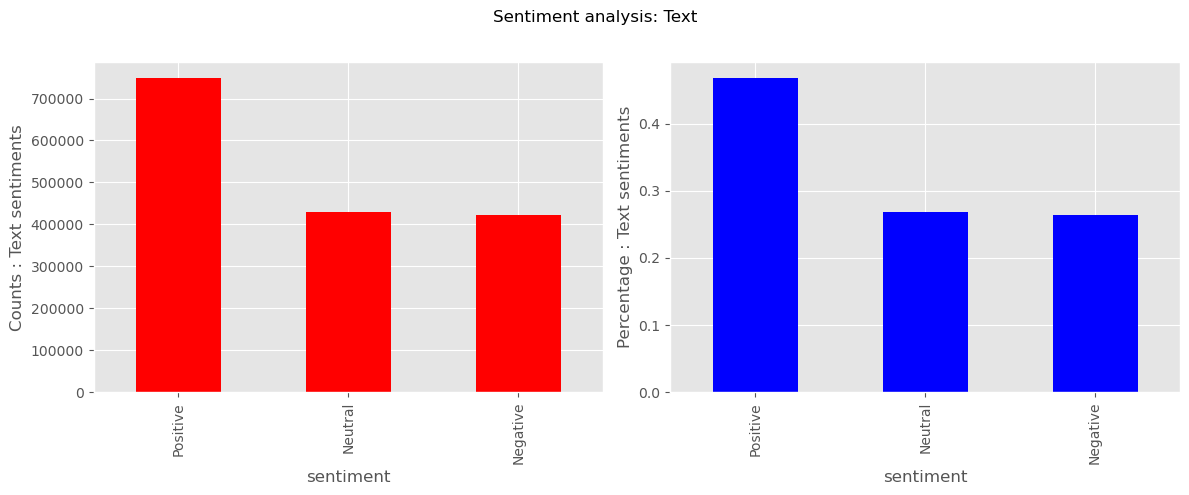

In [28]:
# visiualisiation 

plot_sentiment(tw, 'sentiment', 'Text')

## Time Series

Tweet Time

In [29]:
tw['hour'] = pd.DatetimeIndex(tw['date']).hour
tw['date'] = pd.DatetimeIndex(tw['date']).date
tw['count'] = 1
data_filtered = tw[['hour', 'date', 'count']]
data_filtered.head(5)

,hour,date,count
0,22,2009-04-06,1
1,22,2009-04-06,1
2,22,2009-04-06,1
3,22,2009-04-06,1
4,22,2009-04-06,1


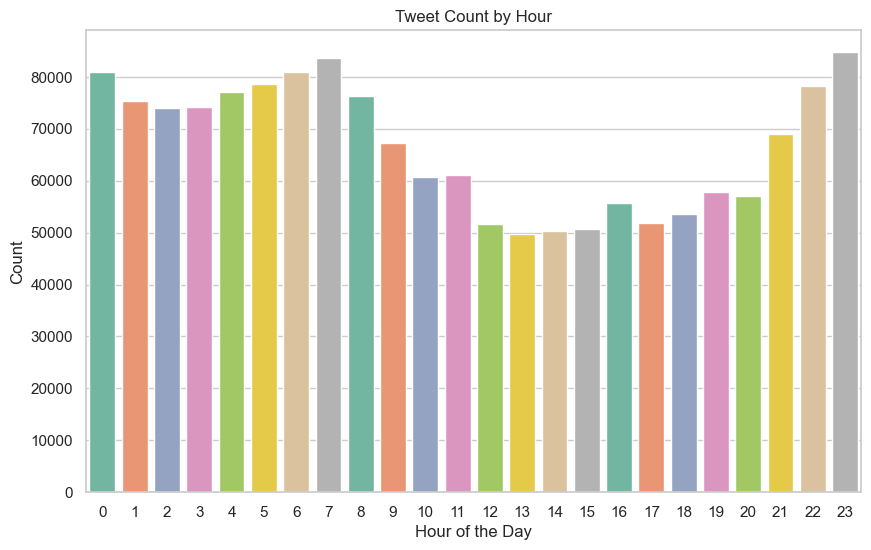

In [30]:
# Assuming you have already prepared your 'data_filtered' DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a countplot to visualize the data
sns.countplot(x="hour", data=data_filtered, palette="Set2")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Tweet Count by Hour")

plt.show()

## Dynamic Dashboard

# ML MODELS

## LSTM

In [53]:
#Conver the word to vec
max_words = 50
max_len = 20

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[ 0  0  0 ...  1 39  7]
 [ 0  0  0 ...  7  4 40]
 [ 0  0  0 ... 36 30 10]
 ...
 [ 0  0  0 ... 42 13  9]
 [ 0  0  0 ...  3 10 49]
 [ 0  0  0 ...  0  0  0]]


In [54]:
print(labels)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [56]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (f"Our data split form:\n")
print(f"X_train: ",len(X_train))
print(f"X_test: ",len(X_test))
print(f"y_train: ",len(y_train))
print(f"y_test: ", len(y_test))

Our data split form:

X_train:  1200000
X_test:  400000
y_train:  1200000
y_test:  400000


In [57]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history1 = model1.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint1]);

Epoch 1/5
37491/37500 [============================>.] - ETA: 0s - loss: 0.9378 - accuracy: 0.5280
Epoch 1: val_accuracy improved from -inf to 0.53812, saving model to best_model1.hdf5
37500/37500 [==============================] - 208s 6ms/step - loss: 0.9378 - accuracy: 0.5280 - val_loss: 0.9248 - val_accuracy: 0.5381
Epoch 2/5
37490/37500 [============================>.] - ETA: 0s - loss: 0.9325 - accuracy: 0.5326
Epoch 2: val_accuracy improved from 0.53812 to 0.53942, saving model to best_model1.hdf5
37500/37500 [==============================] - 136s 4ms/step - loss: 0.9325 - accuracy: 0.5326 - val_loss: 0.9241 - val_accuracy: 0.5394
Epoch 3/5
37492/37500 [============================>.] - ETA: 0s - loss: 0.9328 - accuracy: 0.5325
Epoch 3: val_accuracy did not improve from 0.53942
37500/37500 [==============================] - 139s 4ms/step - loss: 0.9328 - accuracy: 0.5325 - val_loss: 0.9247 - val_accuracy: 0.5375
Epoch 4/5
37490/37500 [============================>.] - ETA: 0s -

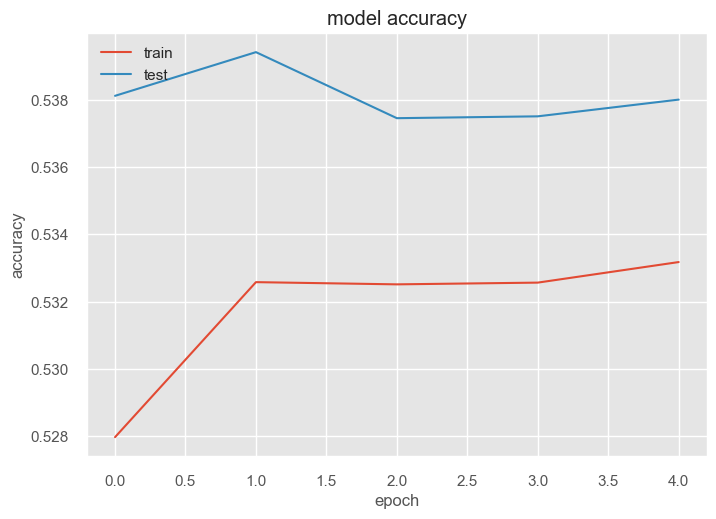

In [58]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

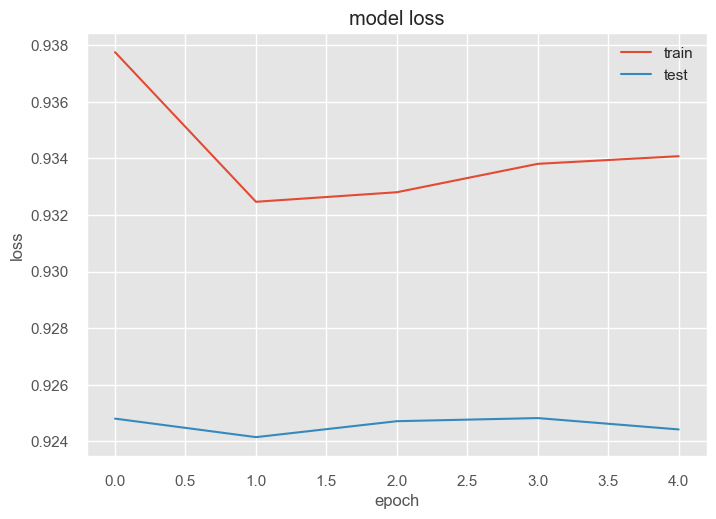

In [59]:
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [60]:
best_model = keras.models.load_model("./best_model1.hdf5")

In [61]:
predictions = best_model.predict(X_test)
print(predictions)

12500/12500 [==============================] - 14s 1ms/step
[[0.2566039  0.25059575 0.49280038]
 [0.21904704 0.18675727 0.59419566]
 [0.26425722 0.30633372 0.429409  ]
 ...
 [0.43856505 0.21367458 0.3477604 ]
 [0.28409776 0.23468725 0.48121494]
 [0.5185736  0.17866534 0.3027611 ]]


In [62]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

12500/12500 - 15s - loss: 0.9241 - accuracy: 0.5394 - 15s/epoch - 1ms/step
Model accuracy:  0.5394225120544434


In [63]:

print(classification_report(np.argmax(y_test, axis=1),np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.47      0.51      0.49    107790
           1       0.50      0.26      0.35    104720
           2       0.59      0.71      0.64    187490

    accuracy                           0.54    400000
   macro avg       0.52      0.49      0.49    400000
weighted avg       0.53      0.54      0.52    400000



## Bidirectional LSTM

In [71]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.Bidirectional(layers.LSTM(20, dropout=0.6)))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
# train model

checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1, save_weights_only=False)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[checkpoint2])

Epoch 1/5
37496/37500 [============================>.] - ETA: 0s - loss: 0.9305 - accuracy: 0.5328
Epoch 1: val_accuracy improved from -inf to 0.54043, saving model to best_model2.hdf5
37500/37500 [==============================] - 195s 5ms/step - loss: 0.9305 - accuracy: 0.5328 - val_loss: 0.9194 - val_accuracy: 0.5404
Epoch 2/5
37492/37500 [============================>.] - ETA: 0s - loss: 0.9226 - accuracy: 0.5389
Epoch 2: val_accuracy improved from 0.54043 to 0.54408, saving model to best_model2.hdf5
37500/37500 [==============================] - 187s 5ms/step - loss: 0.9226 - accuracy: 0.5389 - val_loss: 0.9167 - val_accuracy: 0.5441
Epoch 3/5
37491/37500 [============================>.] - ETA: 0s - loss: 0.9209 - accuracy: 0.5402
Epoch 3: val_accuracy improved from 0.54408 to 0.54531, saving model to best_model2.hdf5
37500/37500 [==============================] - 196s 5ms/step - loss: 0.9209 - accuracy: 0.5402 - val_loss: 0.9151 - val_accuracy: 0.5453
Epoch 4/5
37491/37500 [=====

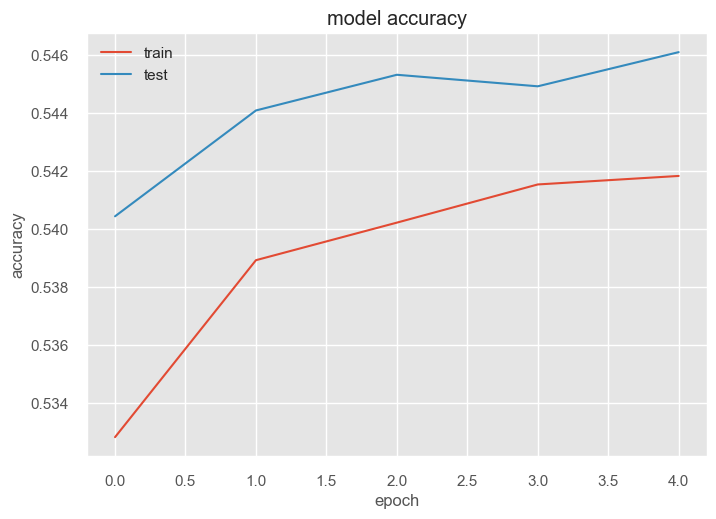

In [73]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

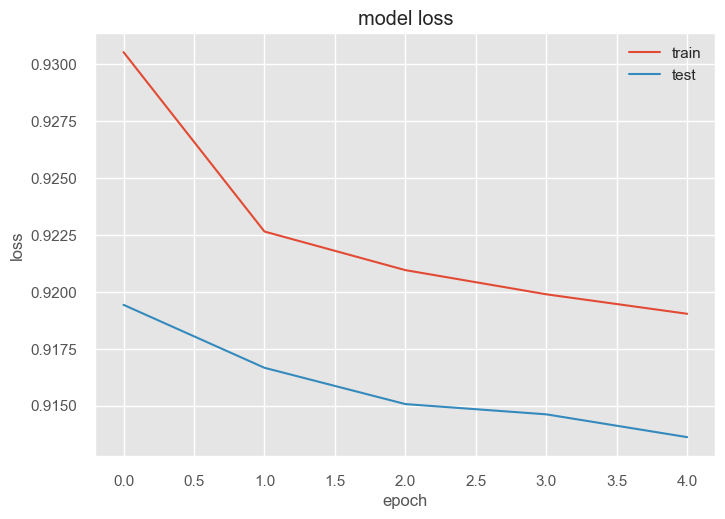

In [74]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [75]:
# Model Evaluation 

best_model = keras.models.load_model("./best_model2.hdf5")

In [76]:
predictions = best_model.predict(X_test)
print(predictions)

12500/12500 [==============================] - 18s 1ms/step
[[0.27857432 0.23742911 0.4839966 ]
 [0.2432918  0.23425533 0.52245283]
 [0.23314895 0.39233315 0.37451786]
 ...
 [0.4089532  0.26201913 0.32902765]
 [0.2450723  0.20370033 0.5512274 ]
 [0.5635176  0.16244717 0.27403525]]


In [77]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

12500/12500 - 18s - loss: 0.9136 - accuracy: 0.5461 - 18s/epoch - 1ms/step
Model accuracy:  0.546085000038147


In [78]:
print(classification_report(np.argmax(y_test, axis=1),np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.48      0.51      0.49    107790
           1       0.53      0.27      0.36    104720
           2       0.58      0.72      0.65    187490

    accuracy                           0.55    400000
   macro avg       0.53      0.50      0.50    400000
weighted avg       0.54      0.55      0.53    400000



## Confusion Matrix

In [130]:
# Load the actual and predicted text values
actual_text_values = ["positive", "positive", "negative", "negative"]
predicted_text_values = ["positive", "negative", "positive", "negative"]

# Create the confusion matrix
confusion_matrix = confusion_matrix(actual_text_values, predicted_text_values)


In [131]:
conf_matrix

,Neutral,Negative,Positive
Neutral,91680,758,15352
Negative,67157,14596,22967
Positive,90045,5763,91682
